# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [21]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns, skiprows=1))


In [15]:
fires_dt.head()

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [16]:
fires_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [18]:
fires_dt.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [51]:
fires_dt.month.value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [64]:
fires_dt=fires_dt[fires_dt['month']!='nov']  #Only single data point, can not stratify properly when splitting (if ends up in test set, is useless, can no be validated if only in train set)

In [52]:
fires_dt.day.value_counts()

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

array([[<Axes: title={'center': 'coord_x'}>,
        <Axes: title={'center': 'coord_y'}>,
        <Axes: title={'center': 'ffmc'}>],
       [<Axes: title={'center': 'dmc'}>, <Axes: title={'center': 'dc'}>,
        <Axes: title={'center': 'isi'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'rh'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

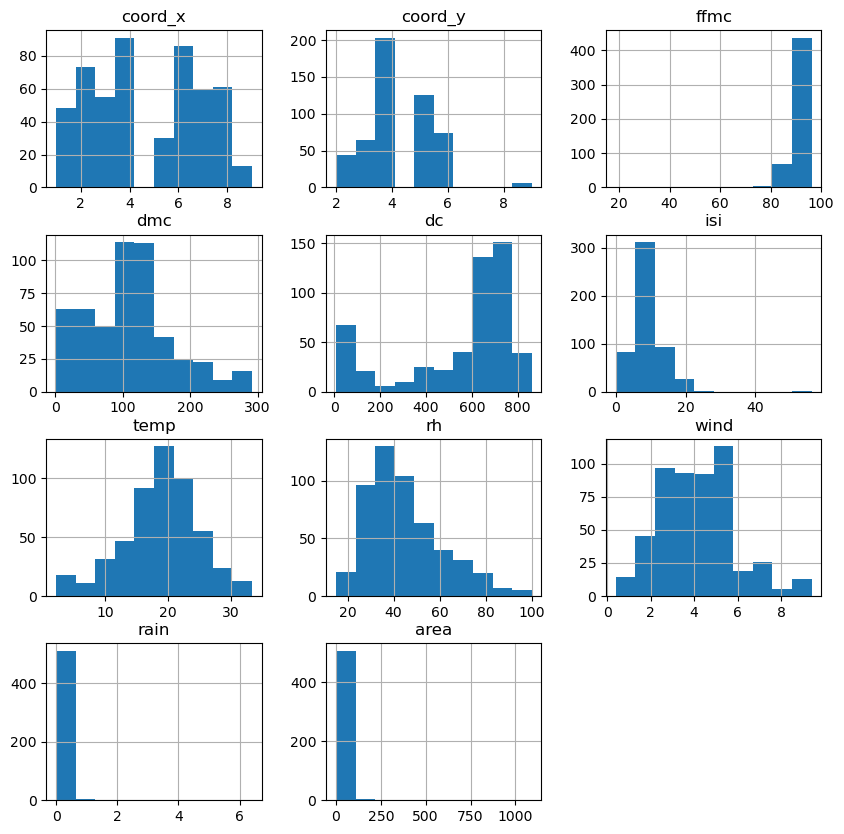

In [27]:
fires_dt.hist(figsize=(10,10))

# Get X and Y

Create the features data frame and target data.

In [66]:
X=fires_dt.drop(columns='area')
Y=fires_dt['area']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

In [33]:
cat_cols = ['month', 'day']
num_cols = X.drop(columns=cat_cols).columns
# preproc1

num_transform=Pipeline([
              ('imputer', KNNImputer(n_neighbors=7, weights='distance')),
              ('scaler', RobustScaler())  #Several of the variables have very lopsided distributions in histogram above, extreme outliers
])

cat_transform=Pipeline([
              ('imputer', SimpleImputer(strategy='most_frequent')),
              ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preproc1 = ColumnTransformer([
    ('numeric', num_transform, num_cols),
    ('category', cat_transform, cat_cols)
])

preproc1

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [34]:
from sklearn.preprocessing import PowerTransformer

In [38]:
# preproc2
num_transform2=Pipeline([
              ('imputer', KNNImputer(n_neighbors=7, weights='distance')),
              ('scaler', RobustScaler()),  #Several of the variables have very lopsided distributions in histogram above, extreme outliers
              ('non-lin transform', PowerTransformer())
])

preproc2 = ColumnTransformer([
    ('numeric', num_transform, ['coord_x', 'coord_y', 'dmc', 'dc', 'temp', 'rh', 'wind']),
    ('numeric non-lin transform', num_transform2, ['ffmc', 'isi', 'rain']),
    ('category', cat_transform, cat_cols)
])

preproc2

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['coord_x', 'coord_y', 'dmc', 'dc', 'temp',
                                  'rh', 'wind']),
                                ('numeric non-lin transform',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler()),
                                                 ('non-lin transform',
                                                  PowerTransformer())]),
                                 ['ffmc', 'isi', 'rain']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [42]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Pipeline A = preproc1 + baseline
pipeA = Pipeline([
    ('preprocessing1', preproc1),
    ('regressor-baseline', Ridge())
])

In [44]:
# Pipeline B = preproc2 + baseline
pipeB = Pipeline([
    ('preprocessing2', preproc2),
    ('regressor-baseline', Ridge())
])

In [47]:
# Pipeline C = preproc1 + advanced model
pipeC = Pipeline([
    ('preprocessing1', preproc1),
    ('regressor-advanced', RandomForestRegressor())
])

In [99]:
# Pipeline D = preproc2 + advanced model
pipeD = Pipeline([
    ('preprocessing2', preproc2),
    ('regressor-advanced', RandomForestRegressor())
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=X['month'])

In [82]:
param_grid_base={'regressor-baseline__alpha' : [0.15, 1.0, 2.0, 3.0, 4.0, 5.0]}
param_grid_advanced={'regressor-advanced__n_estimators' : [25, 50, 100, 200],
                     'regressor-advanced__max_features' : [1.0, 'sqrt']
                     }

In [83]:
grid_cv_A = GridSearchCV(
    estimator=pipeA, 
    param_grid=param_grid_base, 
    scoring = 'neg_mean_absolute_error', 
    cv = 5)
grid_cv_A.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing1',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                                                        ('category',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor-baseline', Ridge())]),
             param_grid={'regressor-baseline__alpha': [0.15, 1.0, 2.0, 3.0, 4.0,
                                                       5.0]},
             scoring='neg_mean_absolute_error')

In [90]:
grid_cv_B = GridSearchCV(
    estimator=pipeB, 
    param_grid=param_grid_base, 
    scoring = 'neg_mean_absolute_error', 
    cv = 5)
grid_cv_B.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing2',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'dmc',
                                                                          'dc',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind']),
                                                                        ('numeric '
                                                                         'non-lin '
                                                                         'transform',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights=...
                                                                                         ('non-lin '
                                                                                          'transform',
                                                                                          PowerTransformer())]),
                                                                         ['ffmc',
                                                                          'isi',
                                                                          'rain']),
                                                                        ('category',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor-baseline', Ridge())]),
             param_grid={'regressor-baseline__alpha': [0.15, 1.0, 2.0, 3.0, 4.0,
                                                       5.0]},
             scoring='neg_mean_absolute_error')

In [93]:
grid_cv_C = GridSearchCV(
    estimator=pipeC, 
    param_grid=param_grid_advanced, 
    scoring = 'neg_mean_absolute_error', 
    cv = 5)
grid_cv_C.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing1',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                                                        ('category',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor-advanced',
                                        RandomForestRegressor())]),
             param_grid={'regressor-advanced__max_features': [1.0, 'sqrt'],
                         'regressor-advanced__n_estimators': [25, 50, 100,
                                                              200]},
             scoring='neg_mean_absolute_error')

In [100]:
grid_cv_D = GridSearchCV(
    estimator=pipeD, 
    param_grid=param_grid_advanced, 
    scoring = 'neg_mean_absolute_error', 
    cv = 5)
grid_cv_D.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing2',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'dmc',
                                                                          'dc',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind']),
                                                                        ('numeric '
                                                                         'non-lin '
                                                                         'transform',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7,
                                                                                                     weights=...
                                                                          'rain']),
                                                                        ('category',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor-advanced',
                                        RandomForestRegressor())]),
             param_grid={'regressor-advanced__max_features': [1.0, 'sqrt'],
                         'regressor-advanced__n_estimators': [25, 50, 100,
                                                              200]},
             scoring='neg_mean_absolute_error')

# Evaluate

+ Which model has the best performance?

In [86]:
pd.DataFrame(grid_cv_A.cv_results_)[['param_regressor-baseline__alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_regressor-baseline__alpha,mean_test_score,std_test_score,rank_test_score
5,5.0,-24.552096,4.477954,1
4,4.0,-24.642727,4.470533,2
3,3.0,-24.765719,4.466821,3
2,2.0,-24.931047,4.473163,4
1,1.0,-25.193551,4.520811,5
0,0.15,-25.817699,4.686426,6


In [91]:
pd.DataFrame(grid_cv_B.cv_results_)[['param_regressor-baseline__alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_regressor-baseline__alpha,mean_test_score,std_test_score,rank_test_score
5,5.0,-24.379433,4.494008,1
4,4.0,-24.459414,4.489410,2
3,3.0,-24.554174,4.492655,3
2,2.0,-24.687848,4.504132,4
1,1.0,-24.896617,4.535539,5
0,0.15,-25.344688,4.667316,6


In [96]:
pd.DataFrame(grid_cv_C.cv_results_)[['param_regressor-advanced__max_features', 'param_regressor-advanced__n_estimators', 'mean_test_score', 'std_test_score', 
                                     'rank_test_score']].sort_values('rank_test_score')

,param_regressor-advanced__max_features,param_regressor-advanced__n_estimators,mean_test_score,std_test_score,rank_test_score
6,sqrt,100,-23.127926,5.937507,1
7,sqrt,200,-23.418355,5.792969,2
5,sqrt,50,-23.857301,5.320340,3
4,sqrt,25,-24.229312,5.984007,4
2,1.0,100,-25.212860,6.247201,5
1,1.0,50,-25.585277,6.259903,6
3,1.0,200,-25.992825,6.095126,7
0,1.0,25,-26.051113,7.050149,8


In [101]:
pd.DataFrame(grid_cv_D.cv_results_)[['param_regressor-advanced__max_features', 'param_regressor-advanced__n_estimators', 'mean_test_score', 'std_test_score', 
                                     'rank_test_score']].sort_values('rank_test_score')

,param_regressor-advanced__max_features,param_regressor-advanced__n_estimators,mean_test_score,std_test_score,rank_test_score
4,sqrt,25,-22.933311,5.200180,1
6,sqrt,100,-23.288525,5.564211,2
7,sqrt,200,-23.376386,5.814338,3
5,sqrt,50,-23.728941,5.155855,4
0,1.0,25,-25.044843,7.034811,5
2,1.0,100,-25.203060,6.490896,6
3,1.0,200,-25.239934,6.170435,7
1,1.0,50,-25.347376,5.799666,8


In [110]:
print(f'For training set, pipe A best score (-MAE) is: {grid_cv_A.best_score_}, with best parameters being: {grid_cv_A.best_params_}')
print(f'For training set, pipe B best score (-MAE) is: {grid_cv_B.best_score_}, with best parameters being: {grid_cv_B.best_params_}')
print(f'For training set, pipe C best score (-MAE) is: {grid_cv_C.best_score_}, with best parameters being: {grid_cv_C.best_params_}')
print(f'For training set, pipe D best score (-MAE) is: {grid_cv_D.best_score_}, with best parameters being: {grid_cv_D.best_params_}')

For training set, pipe A best score (-MAE) is: -24.552095948851804, with best parameters being: {'regressor-baseline__alpha': 5.0}
For training set, pipe B best score (-MAE) is: -24.379433239496855, with best parameters being: {'regressor-baseline__alpha': 5.0}
For training set, pipe C best score (-MAE) is: -23.127926426099073, with best parameters being: {'regressor-advanced__max_features': 'sqrt', 'regressor-advanced__n_estimators': 100}
For training set, pipe D best score (-MAE) is: -22.933310703440938, with best parameters being: {'regressor-advanced__max_features': 'sqrt', 'regressor-advanced__n_estimators': 25}


In [105]:
from sklearn.metrics import mean_absolute_error

In [111]:
Y_pred_testA=grid_cv_A.predict(X_test)
Y_pred_testB=grid_cv_B.predict(X_test)
Y_pred_testC=grid_cv_C.predict(X_test)
Y_pred_testD=grid_cv_D.predict(X_test)

print(f'For test set, pipe A score (MAE) is: {mean_absolute_error(Y_test, Y_pred_testA)}')
print(f'For test set, pipe B score (MAE) is: {mean_absolute_error(Y_test, Y_pred_testB)}')
print(f'For test set, pipe C score (MAE) is: {mean_absolute_error(Y_test, Y_pred_testC)}')
print(f'For test set, pipe D score (MAE) is: {mean_absolute_error(Y_test, Y_pred_testD)}')

For test set, pipe A score (MAE) is: 16.32802650339977
For test set, pipe B score (MAE) is: 16.365130934819422
For test set, pipe C score (MAE) is: 19.869876780094902
For test set, pipe D score (MAE) is: 18.63835935897436


As can be seen, for the test data set, pipeline A (only RobustScaler and Ridge Linear Regression) produces the lowest mean absolute error (MAE) and so performs the best. On the other hand, for training set, pipeline D (RobustScaler, PowerTransfomer and Random Forest Regression) had the lowest MAE and performed the best. This could hint at overfitting, a common issue with random forest models. The differences in training set MAE were not that great (<1 ha), with differences in test set MAE being larger (>2 ha). This would also suggest that test set ranking should be selected. 

# Export

+ Save the best performing model to a pickle file.

In [113]:
import pickle

with open('fire_model_best.pkl', 'wb') as file:
    pickle.dump(grid_cv_A, file)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [120]:
import shap

In [131]:
grid_cv_A.best_estimator_

Pipeline(steps=[('preprocessing1',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor-baseline', Ridge(alpha=5.0))])

In [185]:
grid_cv_A.best_estimator_['preprocessing1'].fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['month', 'day'])])

In [182]:

X_test_proc=grid_cv_A.best_estimator_['preprocessing1'].transform(X_test)
best_model=grid_cv_A.best_estimator_['regressor-baseline'].fit(X_test_proc, Y_test)

In [183]:
shap_values= shap.LinearExplainer(best_model, X_test_proc, ).shap_values(X_test_proc[3])  #randomly picking 4th data point in test set

In [184]:
pd.Series(shap_values, index=grid_cv_A.best_estimator_['preprocessing1'].get_feature_names_out()).sort_values()

category__day_sat     -1.476789
category__month_sep   -1.448242
numeric__temp         -1.302004
numeric__rh           -0.916642
numeric__wind         -0.755509
category__month_aug   -0.704429
numeric__coord_y      -0.307658
numeric__dc           -0.145008
category__day_fri     -0.075536
category__month_apr   -0.017678
category__month_oct   -0.004337
category__month_dec   -0.002605
category__month_jun   -0.002388
category__month_may    0.000000
category__month_jan    0.000000
numeric__rain          0.012910
category__month_feb    0.013112
numeric__ffmc          0.066149
category__day_tue      0.111209
category__month_jul    0.121457
category__day_wed      0.132199
numeric__isi           0.194139
category__month_mar    0.277046
category__day_thu      0.333763
category__day_mon      0.500594
category__day_sun      1.005863
numeric__coord_x       1.494788
numeric__dmc           5.088129
dtype: float64

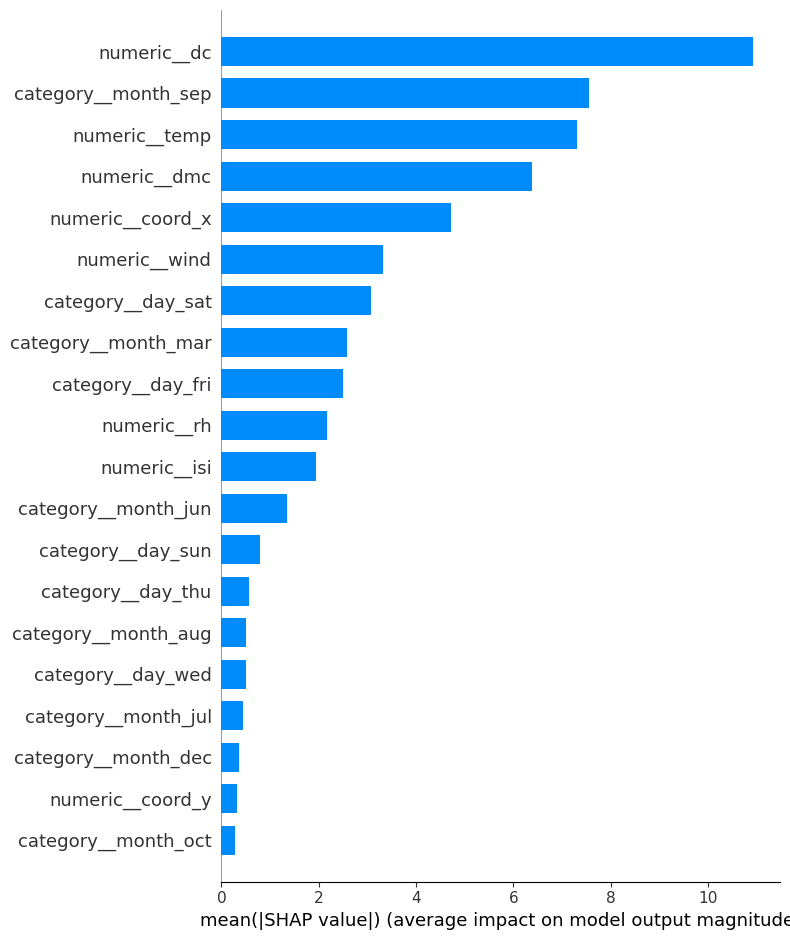

In [161]:
# Getting shap values for entire training set
X_train_proc=grid_cv_A.best_estimator_['preprocessing1'].fit_transform(X_train)
best_model=grid_cv_A.best_estimator_['regressor-baseline'].fit(X_train_proc, Y_train)
shap_values= shap.LinearExplainer(best_model, X_train_proc).shap_values(X_train_proc)
shap.summary_plot(shap_values, X_train_proc, plot_type='bar', feature_names=grid_cv_A.best_estimator_['preprocessing1'].get_feature_names_out())

-For the picked observation in the test set, the most important features are dmc, day (specifically Sat), month (specifically September), X coordinate and temp. \
-Across the training set: DC, month, temp and dmc are the most important, while Y coordinate is the least (while month October shows least contribution, Septemeber shows second highest, so month is fairly important, even if one doesn't have much predictive power individually) \
-Based on training test data contributions I would remove Y coordinate, isi and rh. I would rerun the model with removed features to see difference in peformance.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.